### Upload Damage Curve

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rioxarray as rxr
from rasterio.enums import Resampling


In [30]:
#Create excel for Structural cost by land cover type
Land_cover_info_damage_curve = pd.read_excel('Land_cover_damage_info_curves.xlsx', index_col=0)
# get the maxdamage for reconstruction
maxdam = pd.DataFrame(Land_cover_info_damage_curve['structural $/m²'])
maxdam.to_csv(f'maxdam_land_cover.csv')
maxdam.head(10)

,structural $/m²
Land use code,
1111,363.591983
1121,258.452567
1122,148.413931
1123,39.007545
2310,35.042232
2410,35.042232
3110,0.000000
3120,0.000000
3130,0.000000


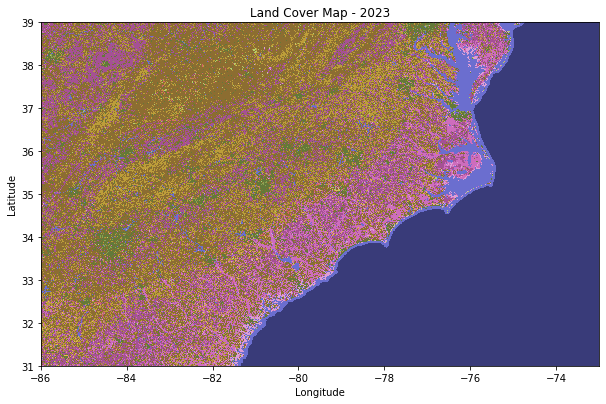

Coordinate Reference System: EPSG:4326
Image Bounds: BoundingBox(left=-86.0, bottom=31.0, right=-73.0, top=39.0)
Width: 1300 pixels, Height: 800 pixels


In [43]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show

# Load the GeoTIFF file
file_path = '/shared_space/ACV/nlcd_nc0.1.tif'

# Open the GeoTIFF file using rasterio
with rasterio.open(file_path) as dataset:
    # Read the image data (band 1)
    image_data = dataset.read(1)
    
    # Get the coordinate system and metadata information
    crs = dataset.crs
    transform = dataset.transform
    width = dataset.width
    height = dataset.height
    bounds = dataset.bounds

# Plotting the image using matplotlib
plt.figure(figsize=(10, 10))
plt.title('Land Cover Map - 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the image with the appropriate colormap (indexed palette from the metadata)
show(image_data, transform=transform, cmap='tab20b')

# Optionally, overlay the coordinate system and bounds
plt.show()

# Additional info about the dataset
print(f"Coordinate Reference System: {crs}")
print(f"Image Bounds: {bounds}")
print(f"Width: {width} pixels, Height: {height} pixels")

In [36]:
import matplotlib.pyplot as plt

filename_land_use = f'/shared_space/ACV/nlcd_nc0.1.tif'
land_use = rxr.open_rasterio(filename_land_use)
land_use = land_use['band'==1]
land_use = land_use.drop_vars(['band'])
land_use.rio.write_crs(3035, inplace=True)

<xarray.DataArray (y: 800, x: 1300)>
[1040000 values with dtype=uint8]
Coordinates:
  * x            (x) float64 -86.0 -85.98 -85.98 -85.97 ... -73.03 -73.02 -73.01
  * y            (y) float64 38.99 38.98 38.97 38.96 ... 31.03 31.02 31.01 31.0
    spatial_ref  int64 0
Attributes:
    LAYER_TYPE:           thematic
    OVERVIEWS_ALGORITHM:  IMAGINE Nearest Neighbor Resampling
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            Layer_1

Text(0.5, 1.0, 'Damage potential of structures in the region based on land use and max. damage values')

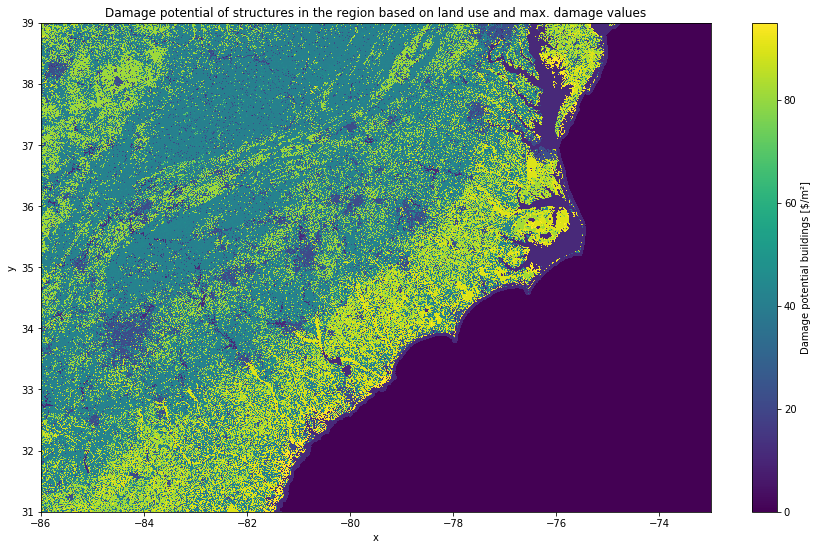

In [45]:
# assign each land use class a maxdamage value and plot this on the map
maxdam_map = land_use
for class_i in maxdam.index:
    maxdam_map = maxdam_map.where(land_use != class_i, maxdam['structural $/m²'][class_i])

plt.figure(figsize=(15, 9))     
maxdam_map.plot(cbar_kwargs={'label': "Damage potential buildings [$/m²]"})

plt.title('Damage potential of structures in the region based on land use and max. damage values')